# 1. Sensitivity Analysis - Data pre-processing and EDA

### ADDS V3

Product of V3. 3,000 less rows after adding 'wind_height' variable into the new working dataset.
Exploration of JSON files made per columns of importance (cells 14 - 17).

### Data Pre-Processing

We start by preparing our Dataframe. First, I will load the data.

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import re

In [37]:
full_df = pd.read_csv("./data/250710-bp3d-db-data.csv")
full_df

,Unnamed: 0,plan_id,plan_uuid,plan_name,objectives,is_public,acres,ensemble_id,ensemble_uuid,ens_name,...,run_uuid,run_ignition_id,run_parameters,run_status,percent_done,run_viz,metrics,run_viz_running,status_updated_time,execution_try
0,0,31,ae225cab-73c0-4cbe-b299-2456b4f41eaf,Osceloa,"{'max_canopy': 10, 'min_canopy': 0, 'max_surfa...",False,39.535458,31,ffef9a16-8855-437a-b685-392e2de6b0e8,Osceloa,...,af36290c-e1db-4c86-bf61-3a64fe95db4c,55,"{'dz': None, 'seed': -1, 'topo': {'topo_calcs'...",Done,100,['https://wifire-data.sdsc.edu:9000/burnpro3d/...,"{'consumption_all_levels': [0.968562662601471,...",[],2024-06-28 16:59:06.916993+00:00,0
1,1,31,ae225cab-73c0-4cbe-b299-2456b4f41eaf,Osceloa,"{'max_canopy': 10, 'min_canopy': 0, 'max_surfa...",False,39.535458,31,ffef9a16-8855-437a-b685-392e2de6b0e8,Osceloa,...,ef0ccf36-708a-4c47-99dd-d10e1474eced,55,"{'dz': None, 'seed': -1, 'topo': {'topo_calcs'...",Done,100,['https://wifire-data.sdsc.edu:9000/burnpro3d/...,{'consumption_all_levels': [0.9693431258201599...,[],2024-06-28 16:59:06.916993+00:00,0
2,2,31,ae225cab-73c0-4cbe-b299-2456b4f41eaf,Osceloa,"{'max_canopy': 10, 'min_canopy': 0, 'max_surfa...",False,39.535458,31,ffef9a16-8855-437a-b685-392e2de6b0e8,Osceloa,...,a5d93c3c-d2dc-4d1f-96b1-913fb9be4c9b,55,"{'dz': None, 'seed': -1, 'topo': {'topo_calcs'...",Done,100,['https://wifire-data.sdsc.edu:9000/burnpro3d/...,{'consumption_all_levels': [0.9666581153869629...,[],2024-06-28 16:59:06.916993+00:00,0
3,3,30,a2c8b347-d6df-400b-b36c-4419830c58ba,ens-blodgett,"{'max_canopy': 10, 'min_canopy': 0, 'max_surfa...",False,39.535458,30,4c31a770-b51a-47a0-9347-a2482e49c96e,ens-blodgett,...,8e131009-e8ad-4e6b-859c-e13694529eb0,54,"{'dz': None, 'seed': -1, 'topo': {'topo_calcs'...",Done,100,['https://wifire-data.sdsc.edu:9000/burnpro3d/...,{'consumption_all_levels': [0.9812050461769104...,[],2024-06-28 16:59:06.916993+00:00,0
4,4,30,a2c8b347-d6df-400b-b36c-4419830c58ba,ens-blodgett,"{'max_canopy': 10, 'min_canopy': 0, 'max_surfa...",False,39.535458,30,4c31a770-b51a-47a0-9347-a2482e49c96e,ens-blodgett,...,458da827-d518-4fab-b260-a94c91f0d77a,54,"{'dz': None, 'seed': -1, 'topo': {'topo_calcs'...",Done,100,['https://wifire-data.sdsc.edu:9000/burnpro3d/...,{'consumption_all_levels': [0.9814903140068054...,[],2024-06-28 16:59:06.916993+00:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14013,16796,2046,77a4bdef-2977-46b6-8d88-ef0e175bacf4,My First Burn Example Jesse Woo,"{'max_canopy': 25, 'min_canopy': 0, 'max_surfa...",False,26.457223,2032,9f22c94b-f7f3-4a1f-a505-5f94159eecca,My First Burn Example Jesse Woo,...,25f9c2e9-86b9-4101-86d8-e530cd09532c,3951,"{'dz': None, 'seed': 222, 'topo': {'topo_calcs...",Done,100,['https://wifire-data.sdsc.edu:9000/burnpro3d/...,{'consumption_all_levels': [0.7167190313339233...,[],2025-06-26 23:44:39.180073+00:00,1
14014,16797,2046,77a4bdef-2977-46b6-8d88-ef0e175bacf4,My First Burn Example Jesse Woo,"{'max_canopy': 25, 'min_canopy': 0, 'max_surfa...",False,26.457223,2032,9f22c94b-f7f3-4a1f-a505-5f94159eecca,My First Burn Example Jesse Woo,...,60765475-7847-48eb-94f7-e7d8f110bfcb,3951,"{'dz': None, 'seed': 222, 'topo': {'topo_calcs...",Done,100,['https://wifire-data.sdsc.edu:9000/burnpro3d/...,{'consumption_all_levels': [0.7439647316932678...,[],2025-06-27 00:00:48.391437+00:00,1
14015,16798,2047,01e9d172-f184-4ac0-9b74-a369ee7ae095,University City Custom Burn,"{'max_canopy': 10, 'min_canopy': 0, 'max_surfa...",False,20.391244,2033,3492e1ee-beb9-4923-b0e9-dc7371a2f66b,University City Custom Burn,...,3ba3ebb2-a3a7-476e-8120-b7451bea26ba,3952,"{'dz': None, 'seed': 222, 'topo': {'topo_calcs...",Done,100,['https://wifire-data.sdsc.edu:9000/burnpro3d/...,{'consumption_all_levels': [0.7066090106964111...,[],2025-06-27 00:04:52.238777+00:00,1
14016,16799,2047,01e9d172-f184-4ac0-9b74-a369ee7ae095,University City Custom Burn,"{'max_canopy': 10, 'min_canopy': 0, 'max_surfa...",False,20.391244,2033,3492e1ee-beb9-4923-b0e9-dc7371a2f

In [38]:
# Let's look at the columns
full_df.columns

Index(['Unnamed: 0', 'plan_id', 'plan_uuid', 'plan_name', 'objectives',
       'is_public', 'acres', 'ensemble_id', 'ensemble_uuid', 'ens_name',
       'ens_status', 'is_single_run', 'qf_parameters', 'fuel_id', 'fuel_uuid',
       'fuel_parameters', 'fuel_status', 'fuel_viz', 'fuel_viz_running',
       'parent_id', 'fuel_ignition_id', 'fuel_blackline_removed',
       'ignition_id', 'ignition_uuid', 'ignition_parameters',
       'ignition_pattern', 'ignition_fuel_removal_area', 'ignition_dat',
       'ignition_viz', 'ignition_viz_running', 'plan_feature_id',
       'unit_feature_id', 'unit_feature_uuid', 'unit_id',
       'unit_feature_properties', 'unit_feature_geom', 'unit_feature_geom_wkt',
       'unit_uuid', 'unit_user_id', 'unit_name', 'unit_uniform',
       'unit_filename', 'unit_uploaded_time', 'unit_is_public', 'run_id',
       'run_uuid', 'run_ignition_id', 'run_parameters', 'run_status',
       'percent_done', 'run_viz', 'metrics', 'run_viz_running',
       'status_updated_ti

There are many columns in this CSV. However, I know from prior exploration and conversations with Ismael that inputs and outputs are contained in a few columns: `fuel_id`, `unit_feature_id`,`run_parameters`, `ignition_pattern`, `ignition_parameters` and `metrics`. Also, there are other few important columns which contain information that we might be interested in. I'll create a `sub_df` with my columns of interest.

**NOTE:** `fuel_id` is a representation of the fuels on the ground coming from FastFuels. There are 822 unique id's, but no parameters provided. `unit_feature_id` is the geographical unit in which the simulation takes place. There are 284 uniques id's, and also no parameters. 

I'm not going to use these two columns in the initial exploratory analysis, but I'll keep them in the dataframe. 

In [39]:
sum(full_df['unit_feature_geom'].isnull())

7

In [40]:
# Keep only the columns that we need
columns_to_keep = ['fuel_id','unit_feature_id','run_parameters',
                   'ignition_parameters','ignition_pattern', 'metrics', 'qf_parameters']
sub_df = full_df[columns_to_keep]

Now I will create our working df. This needs a few tricks. 

### a. Cleaning the `ignition_parameters`,`ignition_pattern`, `metrics` and `run_parameters` columns

In [41]:
# We need to format the ignition parameters column

def clean_json_string(json_str):
    if not isinstance(json_str, str):
        return None  # Skip non-string entries
    # Replace single quotes with double quotes for JSON compatibility
    json_str = json_str.replace("'", '"')
    # Replace Python boolean and None values with JSON-compatible format
    json_str = re.sub(r'\bTrue\b', 'true', json_str)
    json_str = re.sub(r'\bFalse\b', 'false', json_str)
    json_str = re.sub(r'\bNone\b', 'null', json_str)  
    # Remove trailing commas before closing brackets
    json_str = re.sub(r',(\s*[\]}])', r'\1', json_str)
    return json_str

# Apply the cleaning function and parse JSON
def parse_json_column(df, column):
    cleaned_data = []
    error_indexes = []
    for idx, item in df[column].items():  
        cleaned_str = clean_json_string(item)
        try:
            # Try parsing the cleaned string as JSON if it exists
            parsed_json = json.loads(cleaned_str) if cleaned_str else None
            cleaned_data.append(parsed_json)
        except json.JSONDecodeError:
            error_indexes.append(idx)  # Save index on parse failure
            cleaned_data.append(None)  # Handle parse failures
    df.loc[:,f'parsed_{column}'] = cleaned_data
    return error_indexes

# Apply parsing to the DataFrame and collect error indexes - In the current version, we got no errors!
error_indexes_ignition = parse_json_column(sub_df, 'ignition_parameters')

/tmp/ipykernel_242/4294248476.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,f'parsed_{column}'] = cleaned_data


In [42]:
# Collect none_indexes
none_indexes_parameters = sub_df[sub_df['parsed_ignition_parameters'].isnull()].index.tolist()

# I identified that the none-indexes list corresponds to samples with no ignition parameters
# These samples are not useful, so I will delete them.

sub_df = sub_df.drop(index=none_indexes_parameters).reset_index(drop=True)

In [43]:
# Now I'll follow the same process with the column 'ignition_pattern'

error_index_pattern = parse_json_column(sub_df, 'ignition_pattern')
none_indexes_pattern = sub_df[sub_df['parsed_ignition_pattern'].isnull()].index.tolist()
sub_df = sub_df.drop(index=none_indexes_pattern).reset_index(drop=True)

In [44]:
# Now with 'metrics'

error_index_metrics = parse_json_column(sub_df, 'metrics')
none_indexes_metrics = sub_df[sub_df['parsed_metrics'].isnull()].index.tolist()
sub_df = sub_df.drop(index=none_indexes_metrics).reset_index(drop=True)

In [45]:
# And finally, with run_parameters
error_index_run = parse_json_column(sub_df, 'run_parameters')
none_indexes_run = sub_df[sub_df['parsed_run_parameters'].isnull()].index.tolist()
sub_df = sub_df.drop(index=none_indexes_run).reset_index(drop=True)

In [46]:
# EXTRA: with qf_parameters

error_index_qf_parameters = parse_json_column(sub_df, 'qf_parameters')
none_indexes_qf_parameters = sub_df[sub_df['parsed_qf_parameters'].isnull()].index.tolist()
sub_df = sub_df.drop(index=none_indexes_qf_parameters).reset_index(drop=True)

In [47]:
# In case I want to use objectives

#error_index_objectives = parse_json_column(sub_df, 'objectives')
#none_indexes_objectives = sub_df[sub_df['parsed_objectives'].isnull()].index.tolist()
#sub_df = sub_df.drop(index=none_indexes_objectives).reset_index(drop=True)

In [48]:
sub_df

,fuel_id,unit_feature_id,run_parameters,ignition_parameters,ignition_pattern,metrics,qf_parameters,parsed_ignition_parameters,parsed_ignition_pattern,parsed_metrics,parsed_run_parameters,parsed_qf_parameters
0,3023,14,"{'dz': None, 'seed': 222, 'topo': {'topo_calcs...","{'crew': [{'velocity': 0.8940545373267769, 'ga...","{'type': 'FeatureCollection', 'features': [{'t...",{'consumption_all_levels': [0.3528712093830108...,"{'output': {'wind': False, 'emissions': False,...","{'crew': [{'velocity': 0.8940545373267769, 'ga...","{'type': 'FeatureCollection', 'features': [{'t...",{'consumption_all_levels': [0.3528712093830108...,"{'dz': None, 'seed': 222, 'topo': {'topo_calcs...","{'output': {'wind': False, 'emissions': False,..."
1,3023,14,"{'dz': None, 'seed': 222, 'topo': {'topo_calcs...","{'crew': [{'velocity': 0.8940545373267769, 'ga...","{'type': 'FeatureCollection', 'features': [{'t...",{'consumption_all_levels': [0.3723344802856445...,"{'output': {'wind': False, 'emissions': False,...","{'crew': [{'velocity': 0.8940545373267769, 'ga...","{'type': 'FeatureCollection', 'features': [{'t...",{'consumption_all_levels': [0.3723344802856445...,"{'dz': None, 'seed': 222, 'topo': {'topo_calcs...","{'output': {'wind': False, 'emissions': False,..."
2,3023,14,"{'dz': None, 'seed': 222, 'topo': {'topo_calcs...","{'crew': [{'velocity': 0.8940545373267769, 'ga...","{'type': 'FeatureCollection', 'features': [{'t...",{'consumption_all_levels': [0.3321924507617950...,"{'output': {'wind': False, 'emissions': False,...","{'crew': [{'velocity': 0.8940545373267769, 'ga...","{'type': 'FeatureCollection', 'features': [{'t...",{'consumption_all_levels': [0.3321924507617950...,"{'dz': None, 'seed': 222, 'topo': {'topo_calcs...","{'output': {'wind': False, 'emissions': False,..."
3,2209,2807,"{'dz': None, 'seed': 222, 'topo': {'topo_calcs...","{'crew': [{'velocity': 7, 'gap_length': 49, 'd...","{'type': 'FeatureCollection', 'features': [{'t...",{'consumption_all_levels': [0.1548669040203094...,"{'output': {'wind': False, 'emissions': False,...","{'crew': [{'velocity': 7, 'gap_length': 49, 'd...","{'type': 'FeatureCollection', 'features': [{'t...",{'consumption_all_levels': [0.1548669040203094...,"{'dz': None, 'seed': 222, 'topo': {'topo_calcs...","{'output': {'wind': False, 'emissions': False,..."
4,2209,2807,"{'dz': None, 'seed': 222, 'topo': {'topo_calcs...","{'crew': [{'velocity': 7, 'gap_length': 49, 'd...","{'type': 'FeatureCollection', 'features': [{'t...",{'consumption_all_levels': [0.1400300860404968...,"{'output': {'wind': False, 'emissions': False,...","{'crew': [{'velocity': 7, 'gap_length': 49, 'd...","{'type': 'FeatureCollection', 'features': [{'t...",{'consumption_all_levels': [0.1400300860404968...,"{'dz': None, 'seed': 222, 'topo': {'topo_calcs...","{'output': {'wind': False, 'emissions': False,..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8034,3017,2829,"{'dz': None, 'seed': 222, 'topo': {'topo_calcs...","{'crew': [{'velocity': 0.8940545373267769, 'ga...","{'type': 'FeatureCollection', 'features': [{'t...",{'consumption_all_levels': [0.7167190313339233...,{'output': {}},"{'crew': [{'velocity': 0.8940545373267769, 'ga...","{'type': 'FeatureCollection', 'features': [{'t...",{'consumption_all_levels': [0.7167190313339233...,"{'dz': None, 'seed': 222, 'topo': {'topo_calcs...",{'output': {}}
8035,3017,2829,"{'dz': None, 'seed': 222, 'topo': {'topo_calcs...","{'crew': [{'velocity': 0.8940545373267769, 'ga...","{'type': 'FeatureCollection', 'features': [{'t...",{'consumption_all_levels': [0.7439647316932678...,{'output': {}},"{'crew': [{'velocity': 0.8940545373267769, 'ga...","{'type': 'FeatureCollection', 'features': [{'t...",{'consumption_all_levels': [0.7439647316932678...,"{'dz': None, 'seed': 222, 'topo': {'topo_calcs...",{'output': {}}
8036,3019,3648,"{'dz': None, 'seed': 222, 'topo': {'topo_calcs...","{'crew': [{'velocity': 0.8940545373267769, 'ga...","{'type': 'FeatureCollection', 'features': [{'t...",{'consumption_all_lev

After the cleaning, we kept 11468 samples. Now, let's proceed with the building of our custom df.

**NOTE:** When I perform the same parsing for the `objectives` column, I end up losing 960 additional samples. I'm not truly sure if this is information that we need to perform the sensitivity analysis. Therefore, I'll not use the info from this column for now. The code will still be available in case we decide to use this info.
### b. Building our custom df

In [49]:
# Keys from parsed run parameters
keys_list_run_parameters = list(sub_df['parsed_run_parameters'].iloc[0].keys())
print(keys_list_run_parameters)

['dz', 'seed', 'topo', 'output', 'run_id', 'threads', 'uniform', 'sim_time', 'fire_grid', 'wind_speed', 'wind_height', 'wind_direction', 'canopy_moisture', 'partial_outputs', 'number_ignitions', 'quicfire_version', 'surface_moisture', 'wind_speed_units', 'wind_height_units']


In [50]:
# Keys from parsed ignition parameters
keys_list_ignition_parameters = list(sub_df['parsed_ignition_parameters'].iloc[0].keys())
print(keys_list_ignition_parameters)

['crew', 'side', 'depth', 'buffer', 'metric', 'offset', 'replace', 'spacing', 'blackline', 'clockwise', 'heat_depth', 'topo_scale', 'control_line', 'pattern_type', 'firing_direction']


In [51]:
# Keys from parsed ignition pattern
keys_list_ignition_pattern = list(sub_df['parsed_ignition_pattern'].iloc[0].keys())
print(keys_list_ignition_pattern)

['type', 'features', 'elapsedTime', 'driptorchVersion']


In [52]:
# Keys from parsed metrics
keys_list_metrics = list(sub_df['parsed_metrics'].iloc[0].keys())
print(keys_list_metrics)

['consumption_all_levels', 'time_to_traverse_buffer', 'consumption_t0_tNone_z1_z5', 'inside_surface_consumption', 'outside_surface_growth_rate', 'consumption_t0_tNone_z6_zNone', 'outside_canopy_consumption_rate']


In [53]:
new_df = {'fuel_id':[], 'unit_feature_id':[], 'surface_consumed':[], 'midstory_consumed':[], 'canopy_consumed':[], 
          'fdfm':[], 'lfm':[], 'wind_speed':[], 'wind_direction':[], 'wind_height':[], 'side_to_start_ignition':[], 'number_igniters':[], 
          'firing_technique':[], 'ignition_type':[], 'dash_length':[], 'gap_length':[], 'blackline_width':[], 
          'spacing_distance':[], 'igniter_velocity':[], 'ignition_time':[]}

In [54]:
for _, row in sub_df.iterrows():
    
    new_df['fuel_id'].append(row['fuel_id'])
    new_df['unit_feature_id'].append(row['unit_feature_id'])
    new_df['surface_consumed'].append(row['parsed_metrics'].get('inside_surface_consumption', None))
    new_df['midstory_consumed'].append(row['parsed_metrics'].get('consumption_t0_tNone_z1_z5', None))
    new_df['canopy_consumed'].append(row['parsed_metrics'].get('consumption_t0_tNone_z6_zNone', None))
    new_df['fdfm'].append(row['parsed_run_parameters'].get('surface_moisture', None))
    new_df['lfm'].append(row['parsed_run_parameters'].get('canopy_moisture',None))
    new_df['wind_speed'].append(row['parsed_run_parameters'].get('wind_speed', None))
    new_df['wind_direction'].append(row['parsed_run_parameters'].get('wind_direction', None))
    new_df['wind_height'].append(row['parsed_run_parameters'].get('wind_height', None))
    new_df['side_to_start_ignition'].append(row['parsed_ignition_parameters'].get('side', None))
    new_df['number_igniters'].append(len(row['parsed_ignition_parameters']['crew']))
    new_df['firing_technique'].append(row['parsed_ignition_parameters'].get('pattern_type', None))

    if 'dash_length' in row['parsed_ignition_parameters']['crew'][0] and 'gap_length' in row['parsed_ignition_parameters']['crew'][0]:
        new_df['ignition_type'].append('dashes')
        new_df['dash_length'].append(row['parsed_ignition_parameters']['crew'][0]['dash_length'])
        new_df['gap_length'].append(row['parsed_ignition_parameters']['crew'][0]['gap_length'])
    elif 'gap_length' in row['parsed_ignition_parameters']['crew'][0]:
        new_df['ignition_type'].append('dots')
        new_df['gap_length'].append(row['parsed_ignition_parameters']['crew'][0]['gap_length'])
    else:
        new_df['ignition_type'].append('lines')
    
    new_df['blackline_width'].append(row['parsed_ignition_parameters'].get('blackline', None))
    new_df['spacing_distance'].append(row['parsed_ignition_parameters'].get('spacing', None))
    new_df['igniter_velocity'].append(row['parsed_ignition_parameters']['crew'][0].get('velocity', None))
    new_df['ignition_time'].append(row['parsed_ignition_pattern'].get('elapsedTime', None))
    

In [55]:
df = pd.DataFrame(new_df)
# Store our working df in a csv
df.to_csv('./data/working_df_v3.csv')

In [56]:
df

,fuel_id,unit_feature_id,surface_consumed,midstory_consumed,canopy_consumed,fdfm,lfm,wind_speed,wind_direction,wind_height,side_to_start_ignition,number_igniters,firing_technique,ignition_type,dash_length,gap_length,blackline_width,spacing_distance,igniter_velocity,ignition_time
0,3023,14,0.352871,0.072806,0.038869,0.1,0.9,5.0,345.0,20.0,right,3,strip,dashes,4.571777,4.571777,3.047851,9.143554,0.894055,558.849736
1,3023,14,0.372334,0.113296,0.060329,0.1,0.9,5.0,15.0,20.0,right,3,strip,dashes,4.571777,4.571777,3.047851,9.143554,0.894055,558.849736
2,3023,14,0.332192,0.071040,0.033252,0.1,0.9,5.0,0.0,20.0,right,3,strip,dashes,4.571777,4.571777,3.047851,9.143554,0.894055,558.849736
3,2209,2807,0.154867,0.047592,0.000653,0.1,0.9,7.0,0.0,20.0,right,3,ring,dashes,49.000000,49.000000,3.047851,9.143554,7.000000,636.336624
4,2209,2807,0.140030,0.040336,0.000334,0.1,0.9,7.0,15.0,20.0,right,3,ring,dashes,49.000000,49.000000,3.047851,9.143554,7.000000,636.336624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8034,3017,2829,0.716719,0.264919,0.042367,0.1,1.0,12.0,37.0,22.0,right,4,strip,dashes,15.000000,15.000000,10.000000,30.000000,0.894055,1417.194522
8035,3017,2829,0.743965,0.324826,0.065507,0.1,0.9,12.0,7.0,22.0,right,4,strip,dashes,15.000000,15.000000,10.000000,30.000000,0.894055,1417.194522
8036,3019,3648,0.706609,NaN,NaN,0.1,0.9,7.0,15.0,20.0,right,3,strip,dashes,4.571777,4.571777,3.047851,9.143554,0.894055,3588.474768
8037,3019,3648,0.703032,NaN,NaN,0.1,0.9,7.0,0.0,20.0,right,3,strip,dashes,4.571777,4.571777,3.047851,9.143554,0.894055,3588.474768


Adding wind height as input eliminates more than 3,000 data rows from the data frame.

### Visual Analysis

Now we will proceed with a visual analysis, showing the distribution for both continuous and discrete features

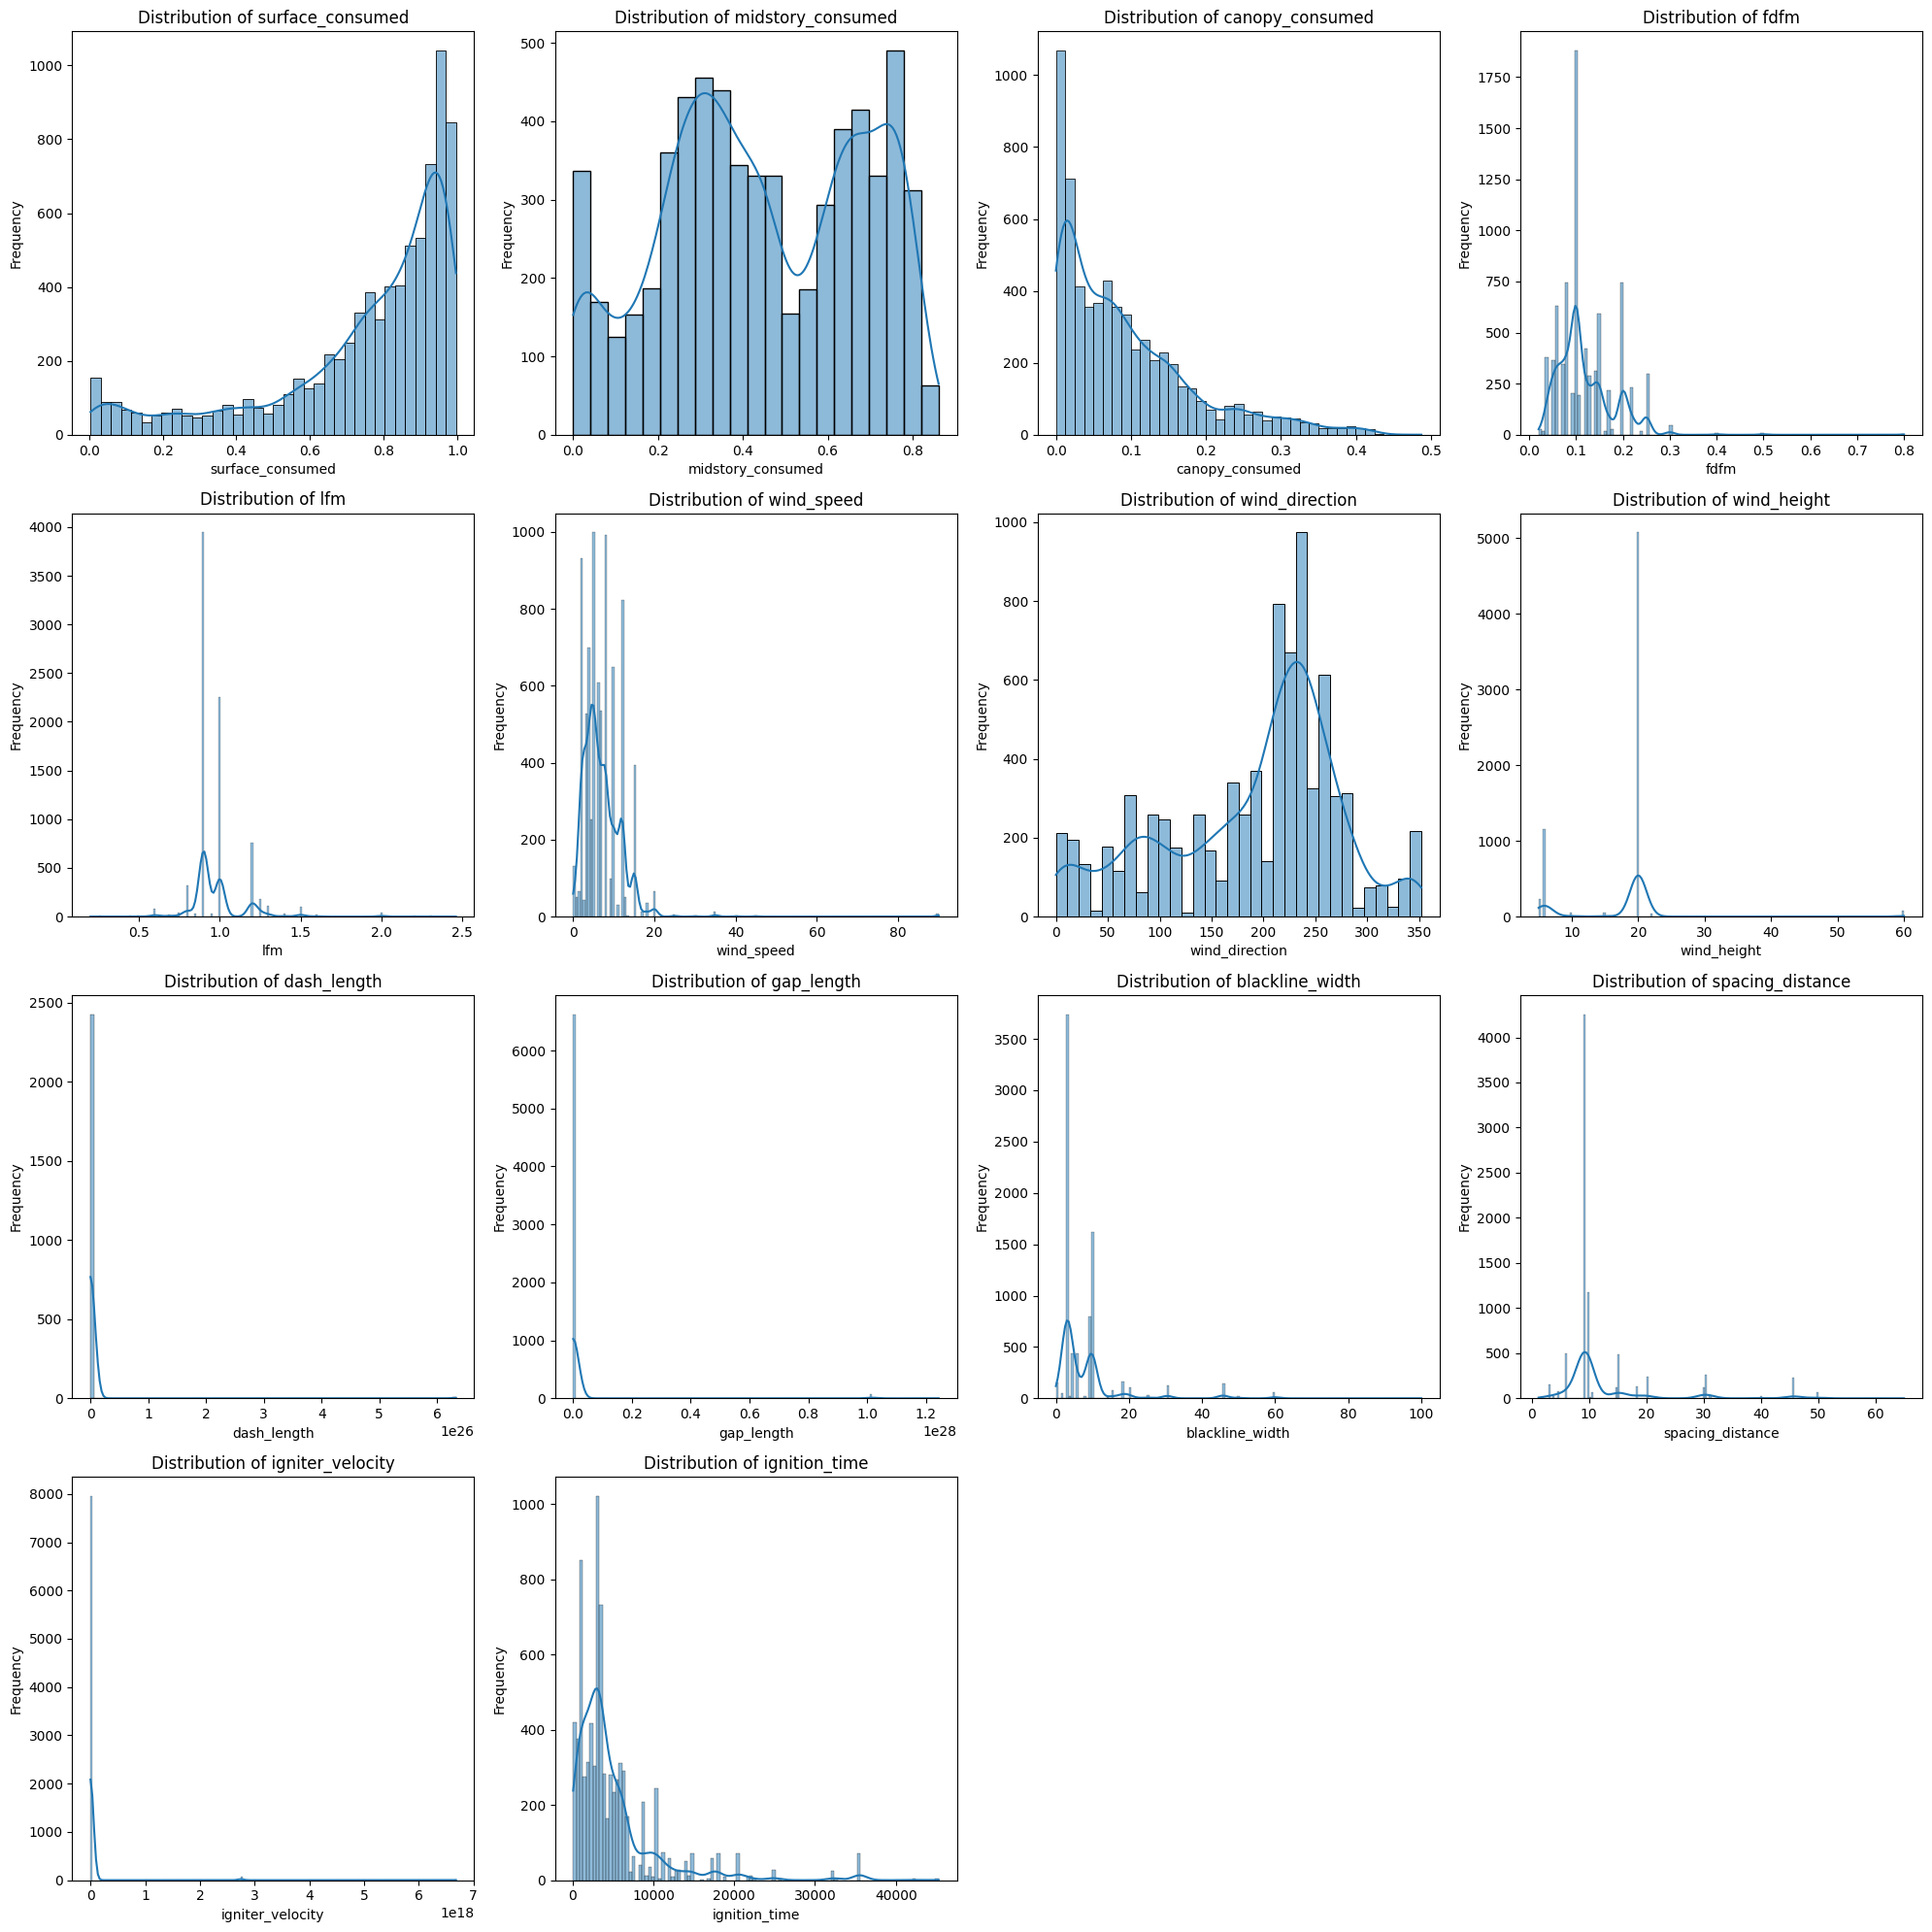

In [57]:
# Contiuous features
continuous_columns = ['surface_consumed', 'midstory_consumed', 'canopy_consumed', 'fdfm',
                     'lfm','wind_speed', 'wind_direction', 'wind_height', 'dash_length', 'gap_length',
                     'blackline_width', 'spacing_distance', 'igniter_velocity', 'ignition_time']  

num_columns = len(continuous_columns)
rows = (num_columns + 3) // 4  # Number of rows needed for a 4-column grid

# Plot each column in the grid
plt.figure(figsize=(20, 5 * rows))
for i, col in enumerate(continuous_columns, 1):
    plt.subplot(rows, 4, i)
    sns.histplot(df[col].dropna(), kde=True)  # Drop NaN for clean distribution, add KDE for smooth curve
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Igniter velocity looks kind of weird to be honest. Let's display the summary statistics.

In [58]:
df['igniter_velocity'].describe()

count    8.039000e+03
mean     3.210601e+16
std      3.415150e+17
min      2.235136e-01
25%      8.940545e-01
50%      2.000000e+00
75%      2.000000e+00
max      6.682500e+18
Name: igniter_velocity, dtype: float64

It is clear that the vast majority of the observations are below 1.000. However, I think is worth to visually separate these 2 groups (above and below 1.000) to have a better understanding on the number of observations on each group and how they are distributed.

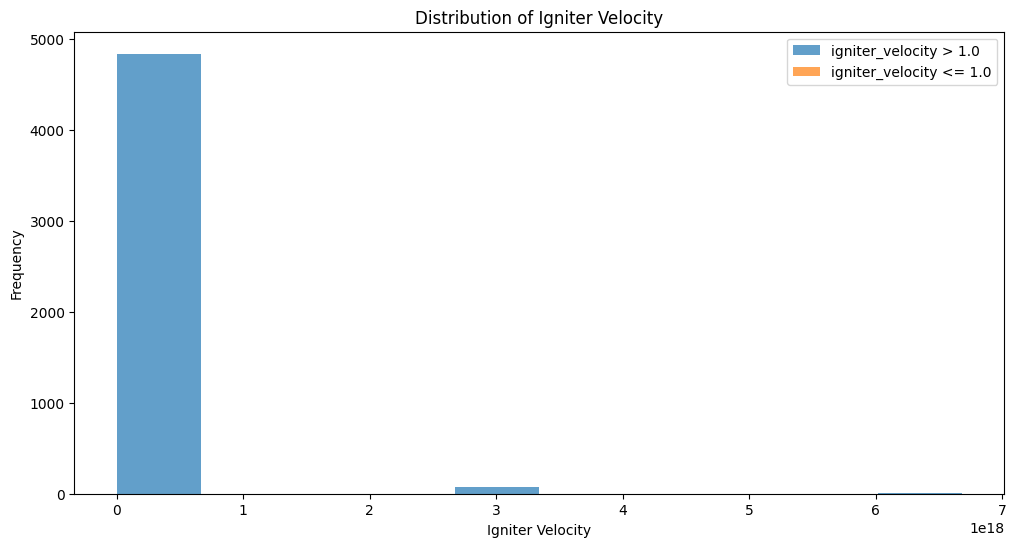

In [59]:
# Separating the series into two groups
greater_than_one = df['igniter_velocity'][df['igniter_velocity'] > 1.0]
equal_or_lower_than_one = df['igniter_velocity'][df['igniter_velocity'] <= 1.0]

# Plotting the distributions
plt.figure(figsize=(12, 6))

# Distribution for values greater than 1.0
plt.hist(greater_than_one, bins=10, alpha=0.7, label='igniter_velocity > 1.0')
# Distribution for values equal to or less than 1.0
plt.hist(equal_or_lower_than_one, bins=10, alpha=0.7, label='igniter_velocity <= 1.0')

# Adding titles and labels
plt.title('Distribution of Igniter Velocity')
plt.xlabel('Igniter Velocity')
plt.ylabel('Frequency')
plt.legend()

# Show plot
plt.show()

I'm not a huge fan of the distribution. It seems that igniter velocity is either a constant (1.000) or it is highly correlated with the tile. 

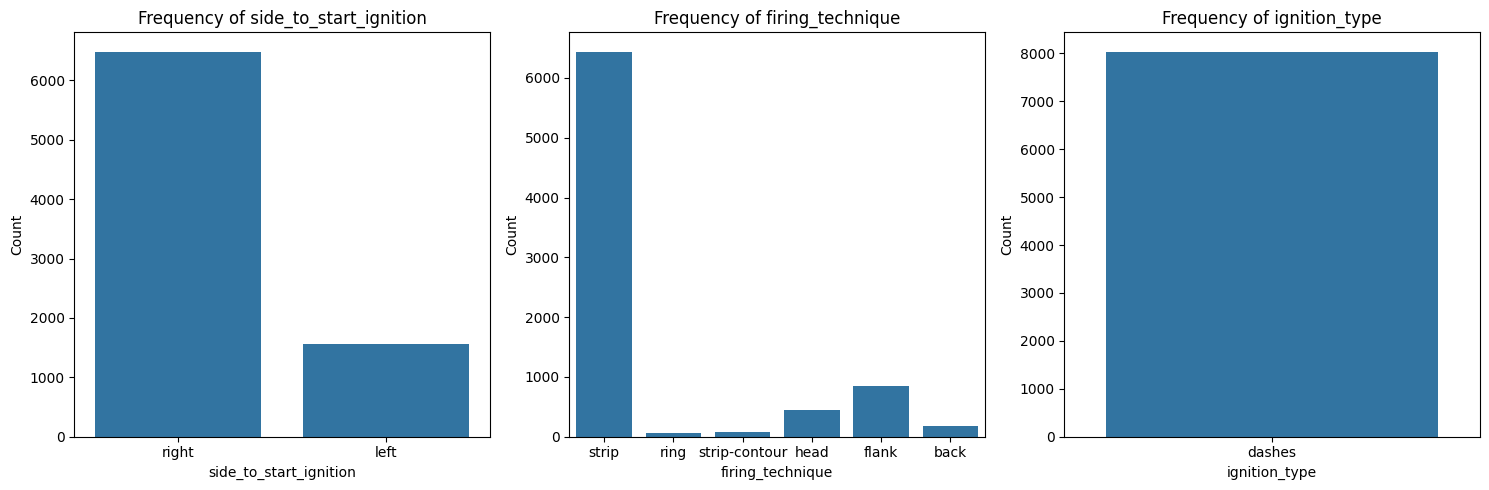

In [60]:
# Discrete features
discrete_columns = ['side_to_start_ignition', 'firing_technique', 'ignition_type' ]

num_columns = len(discrete_columns)

plt.figure(figsize=(15, 5))
for i, col in enumerate(discrete_columns, 1):
    plt.subplot(1, num_columns, i)
    sns.countplot(data=df, x=col)
    plt.title(f'Frequency of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

We lack balance in our samples. Mostof the samples will show a right side to start ignition, with a *strip* firing technique and *dashes* as the ignition type.

Next notebook I will perform a first attempt of a quantitative SA.

In [61]:
min_max_df = df.agg(['min', 'max'])
min_max_df = min_max_df.drop(columns=discrete_columns)
min_max_df

,fuel_id,unit_feature_id,surface_consumed,midstory_consumed,canopy_consumed,fdfm,lfm,wind_speed,wind_direction,wind_height,number_igniters,dash_length,gap_length,blackline_width,spacing_distance,igniter_velocity,ignition_time
min,569,14,0.003862,0.000000,0.000000,0.02,0.20,0.0,0.0,5.0,1,6.096000e-01,9.143554e-01,0.0,1.219141,2.235136e-01,90.434320
max,3047,3648,0.996155,0.861364,0.487125,0.80,2.46,90.0,352.0,60.0,20,6.325338e+26,1.243535e+28,100.0,65.000000,6.682500e+18,45297.804314
